## Project: Visualizing the Orion Constellation

In this project you are Dr. Jillian Bellovary, a real-life astronomer for the Hayden Planetarium at the American Museum of Natural History. As an astronomer, part of your job is to study the stars. You've recently become interested in the constellation Orion, a collection of stars that appear in our night sky and form the shape of [Orion](https://en.wikipedia.org/wiki/Orion_(constellation)), a warrior God from ancient Greek mythology. 

As a researcher on the Hayden Planetarium team, you are in charge of visualizing the Orion constellation in 3D using the Matplotlib function `.scatter()`. To learn more about the `.scatter()` you can see the Matplotlib documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). 

You will create a rotate-able visualization of the position of the Orion's stars and get a better sense of their actual positions. To achieve this, you will be mapping real data from outer space that maps the position of the stars in the sky

The goal of the project is to understand spatial perspective. Once you visualize Orion in both 2D and 3D, you will be able to see the difference in the constellation shape humans see from earth versus the actual position of the stars that make up this constellation. 

<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Orion_constellation_with_star_labels.jpg" alt="Orion" style="width: 400px;"/>



## 1. Set-Up
The following set-up is new and specific to the project. It is very similar to the way you have imported Matplotlib in previous lessons.

+ Add `%matplotlib notebook` in the cell below. This is a new statement that you may not have seen before. It will allow you to be able to rotate your visualization in this jupyter notebook.

+ We will be using a subset of Matplotlib: `matplotlib.pyplot`. Import the subset as you have been importing it in previous lessons: `from matplotlib import pyplot as plt`


+ In order to see our 3D visualization, we also need to add this new line after we import Matplotlib:
`from mpl_toolkits.mplot3d import Axes3D`


In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 2. Get familiar with real data

Astronomers describe a star's position in the sky by using a pair of angles: declination and right ascension. Declination is similar to longitude, but it is projected on the celestian fear. Right ascension is known as the "hour angle" because it accounts for time of day and earth's rotaiton. Both angles are relative to the celestial equator. You can learn more about star position [here](https://en.wikipedia.org/wiki/Star_position).

The `x`, `y`, and `z` lists below are composed of the x, y, z coordinates for each star in the collection of stars that make up the Orion constellation as documented in a paper by Nottingham Trent Univesity on "The Orion constellation as an installation" found [here](https://arxiv.org/ftp/arxiv/papers/1110/1110.3469.pdf).

Spend some time looking at `x`, `y`, and `z`, does each fall within a range?

> Comments by t-w-g

>>1. Added in 'a' , 'd', and 'names' lists which are the corresponding ascension, declination, and name  data for the stars in the 'x,y,z' lists.
>>2. Added in data for a 'dummy' star. Why? The 'dummy' star is there to force an equal scale on the 3-d plot. Without it, matplotlib is plotting the 'x', 'y', and 'z' min to max ranges as equal- this is decidedly NOT true. The range for 'y' is 13.43K light years, 'x' is 1.07K l.y., 'z' is 2.36K l.y. The 'dummy' forces the 'x' and 'z' range to roughly scale.
>>3. Added in data for 'Earth', which according to the attached article is located at (0,0,1)
>>4. ALSO- instead of plotting 'x, y' plotting 'x, z'. This will give us closer to the visual from Earth since 'y' axis is primarily 'up' from Earth.


In [3]:
# Orion
x = [-0.41, 0.57, 0.07, 0.00, -0.29, -0.32,-0.50,-0.23, -0.23, 5, 0]
y = [4.12, 7.71, 2.36, 9.10, 13.35, 8.13, 7.19, 13.25, 13.43, 10, 0]
z = [2.06, 0.84, 1.56, 2.07, 2.36, 1.72, 0.66, 1.25, 1.38, 5, 1]
a = [[5,55.16],[5,14.5],[5,25],[5,32],[5,36.2],[5,40.75],[5,48],[5,36],[5,36]]
d = [[7,24.4],[-8,12.3],[6,21],[-0,18],[-1,12],[-1,56.55],[-9,40],[-5,54],[-5,23]]
names = ['α, Betelgeuse', 'ß, Rigel', 'Γ, Bellatrix', 'δ, Mintaka', 'ε, Alnilam', 'z, Alnitak', 'k, Saiph', 'i, iota','M42, Orion Nebula', 'dummy', 'Earth']

## 3. Create a 2D Visualization

Before we visualize the stars in 3D, let's get a sense of what they look like in 2D. 

Create a figure for the 2d plot and save it to a variable name `fig`. (hint: `plt.figure()`)

Add your subplot `.add_subplot()` as the single subplot, with `1,1,1`.(hint: `add_subplot(1,1,1)`)

Use the scatter [function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to visualize your `x` and `y` coordinates. (hint: `.scatter(x,y)`)

Render your visualization. (hint: `plt.show()`)

Does the 2D visualization look like the Orion constellation we see in the night sky? Do you recognize its shape in 2D? There is a curve to the sky, and this is a flat visualization, but we will visualize it in 3D in the next step to get a better sense of the actual star positions. 


> Comment by t-w-g: 

>>The writer above is partially correct, but at the same time the information is described incorrectly: the authors of the attached PDF were creating a 3-D model of how the stars are actually oriented in the local galaxy, so plotting an X and Y axes doesn't mean anything. Plotting the X and Z axes gives a closer match to what we see from Earth because the Y axis is effectively the 'up' axis. See below for a better representation of what we see using right ascension and declination. 

<IPython.core.display.Javascript object>


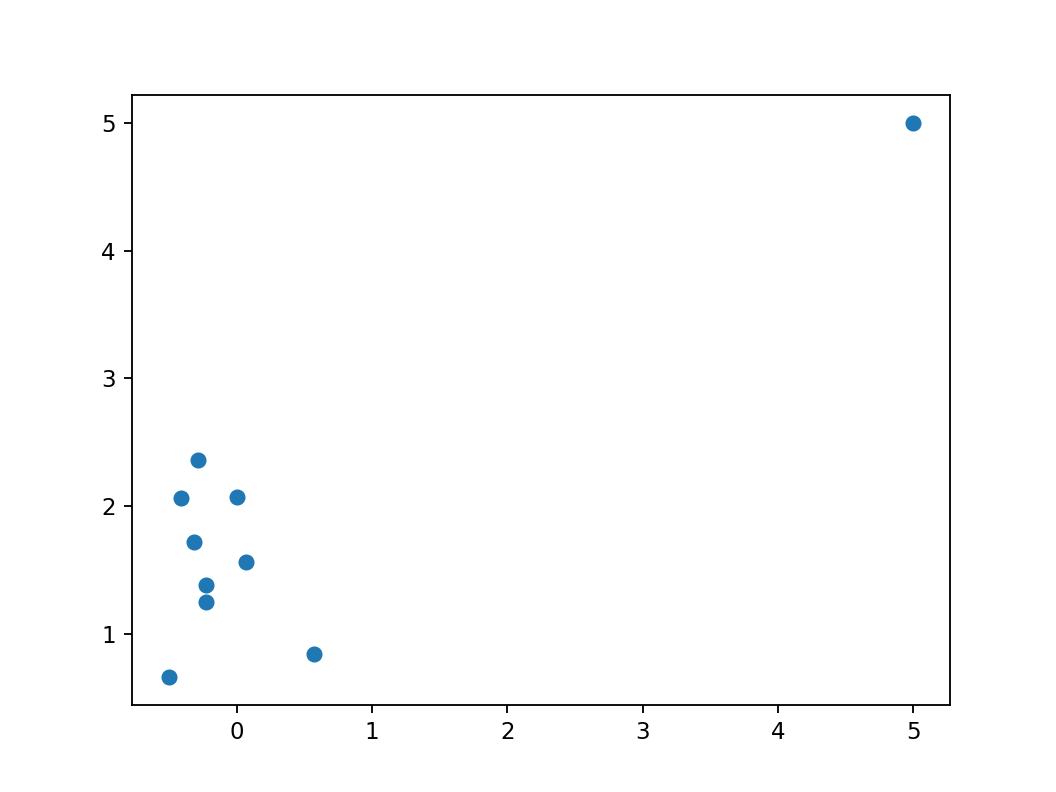

In [4]:
fig = plt.figure()
fig.add_subplot(1,1,1)
plt.scatter(x[:10],z[:10])

plt.savefig('x-z_plot_orion.png')
plt.show()

## 3.5 Show Apparent Positions from Earth

> Comments by t-w-g
This is included so that we can have a plot of how things 'should' look from Earth.

>> Not sure why Alnitak at left of Orion's belt looks so wrong... Otherwise the constellation is recognizable on the plot- just need to squish the 'x' axis.

<IPython.core.display.Javascript object>


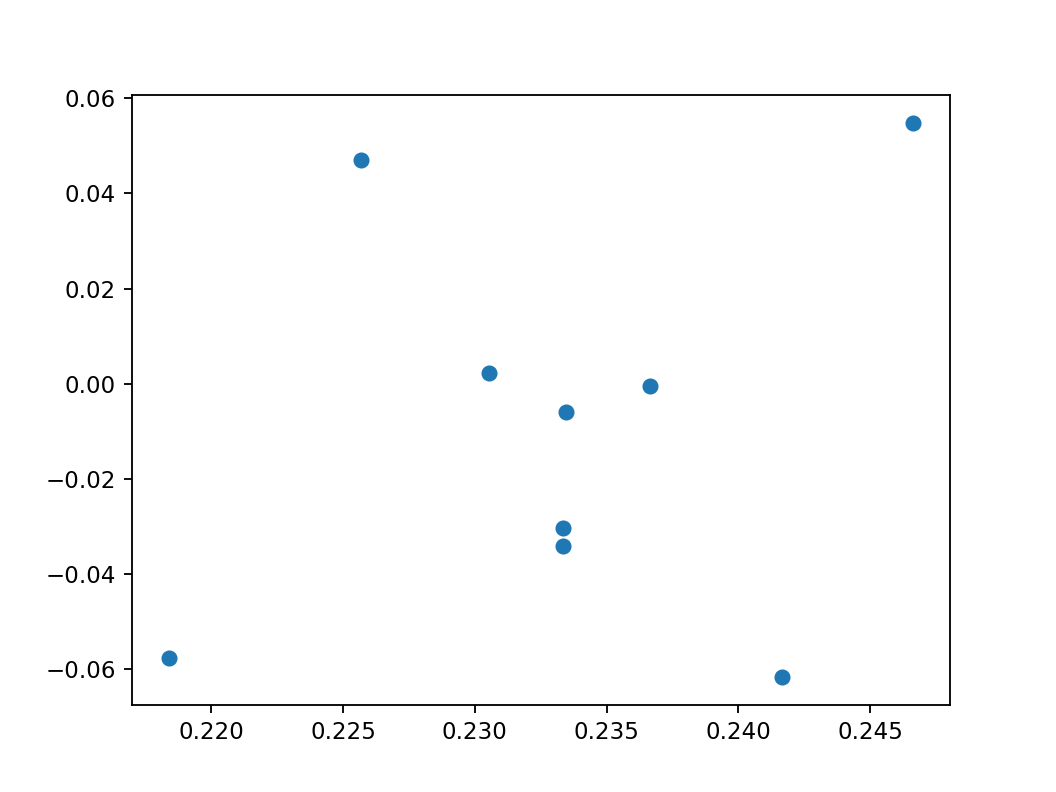

In [5]:
figAD = plt.figure()
figAD.add_subplot(1,1,1)
a_dec = []
for loc in a:
    a_dec.append((loc[0] + loc[1]/60)/24)
    
d_dec = []
for loc in d:
    d_dec.append(((loc[0] + loc[1]/60)/90)/1.5)

plt.scatter(a_dec, d_dec)

plt.savefig('ra+d_orion.png')
plt.show()

## 4. Create a 3D Visualization

Create a figure for the 3D plot and save it to a variable name `fig_3d`. (hint: `plt.figure()`)


Since this will be a 3D projection, we want to make to tell Matplotlib this will be a 3D plot.  

To add a 3D projection, you must include a the projection argument. It would look like this:
```py
projection="3d"
```

Add your subplot with `.add_subplot()` as the single subplot `1,1,1` and specify your `projection` as `3d`:

`fig_3d.add_subplot(1,1,1,projection="3d")`)

Since this visualization will be in 3D, we will need our third dimension. In this case, our `z` coordinate. 

Create a new variable `constellation3d` and call the scatter [function](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) with your `x`, `y` and `z` coordinates. 

Include `z` just as you have been including the other two axes. (hint: `.scatter(x,y,z)`)

Render your visualization. (hint `plt.show()`.)


> Comment by t-w-g
>> Adding in marker shapes, colors, and labels to help identify which stars are which. With the 'dummy' star all three axes are roughly scaled with one another. From this plot you can see the four outer stars (Betelgeuse, Bellatrix, Rigel, and Saiph) as orange triangles. They are all closer to Earth (in blue) than the belt stars (in red).

>> If you align the 3d plot correctly, you can see approximately the perspective from Earth. Very nice...


<IPython.core.display.Javascript object>


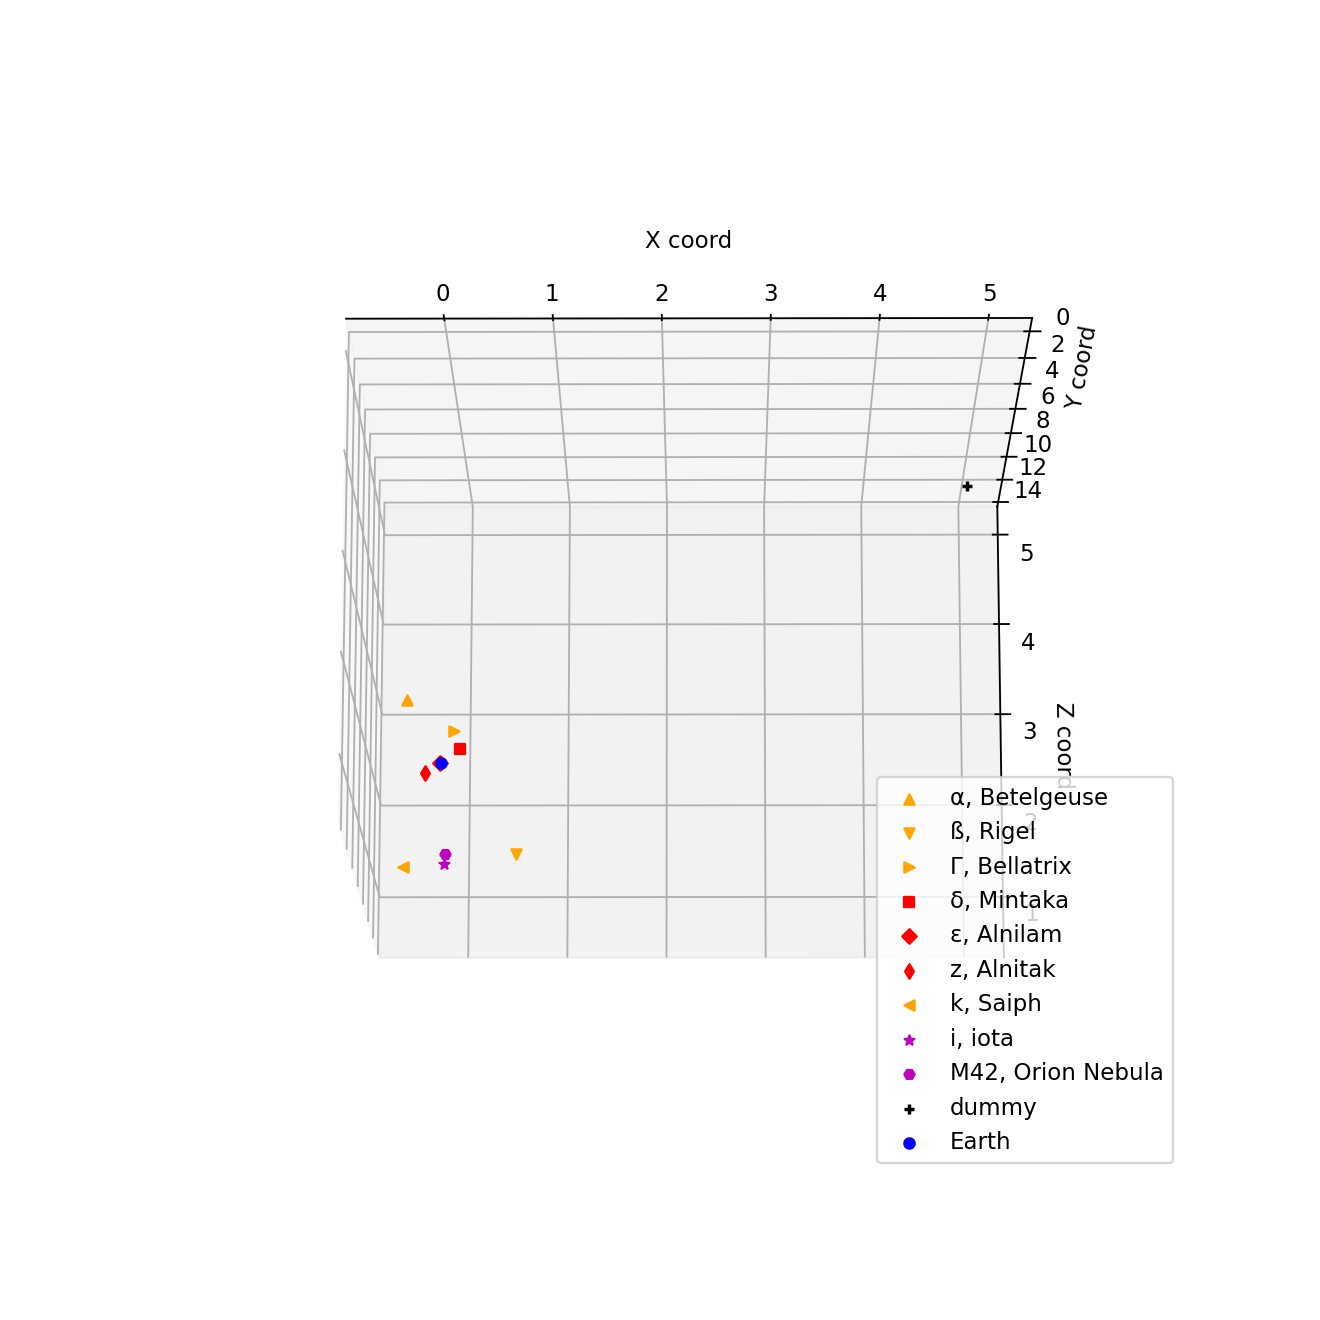

In [9]:
fig_3d = plt.figure(figsize=(8,8))
constellation3d = fig_3d.add_subplot(1,1,1,projection='3d')
constellation3d.scatter(x[0], y[0], z[0], marker = '^', color = 'orange', label = names[0])
constellation3d.scatter(x[1], y[1], z[1], marker = 'v', color = 'orange', label = names[1])
constellation3d.scatter(x[2], y[2], z[2], marker = '>', color = 'orange', label = names[2] )
constellation3d.scatter(x[3], y[3], z[3], marker = 's', color = 'red', label = names[3])
constellation3d.scatter(x[4], y[4], z[4], marker = 'D', color = 'red', label = names[4])
constellation3d.scatter(x[5], y[5], z[5], marker = 'd', color = 'red', label = names[5])
constellation3d.scatter(x[6], y[6], z[6], marker = '<', color = 'orange', label = names[6])
constellation3d.scatter(x[7], y[7], z[7], marker = '*', color = 'm', label = names[7])
constellation3d.scatter(x[8], y[8], z[8], marker = 'H', color = 'm', label = names[8])
constellation3d.scatter(x[9], y[9], z[9], marker = '+', color = 'black', label = names[9])
constellation3d.scatter(x[-1],y[-1],z[-1], marker = 'o', color = 'blue', label = names[10])

constellation3d.set_xlabel('X coord')
constellation3d.set_ylabel('Y coord')
constellation3d.set_zlabel('Z coord')

plt.legend(loc=4)
plt.savefig('3d_actual_orientation_orion.png')
plt.show()

## 5. Rotate and explore

Use your mouse to click and drag the 3D visualization in the previous step. This will rotate the scatter plot. As you rotate, can you see Orion from different angles? 

Note: The on and off button that appears above the 3D scatter plot allows you to toggle rotation of your 3D visualization in your notebook.

Take your time, rotate around! Remember, this will never look exactly like the Orion we see from Earth. The visualization does not curve as the night sky does.
There is beauty in the new understanding of Earthly perspective! We see the shape of the warrior Orion because of Earth's location in the universe and the location of the stars in that constellation.

Feel free to map more stars by looking up other celestial x, y, z coordinates [here](http://www.stellar-database.com/).
